# Implementing Logistic Regression with numpy

In this problem, you will need to write python codes and build logistic regression classifiers on breast cancer dataset to predict whether the cancer is malignant or benign on the patients. The dataset contains 569 samples and 30 features. You may refer to https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) for more information about the dataset.

Your implementations should include:
- Load data, clean data and partition them into training and testing data.
- Build logistic regression and L2-regularized logistic regression models.
- Implement three gradient descent algorithms for each model: Batch Gradient Descent (GD), Mini-Batch Gradient Descent (MB-SGD) and Stochastic Gradient Descent (SGD).
- Compare the loss curve of three gradient descent algorithms (GD/MB-SGD/SGD).
- Compare logistic regression and regularized version in terms of training and testing error.
- Try to tune different parameters (regularization parameter, learning rate, etc.) to see their effects.

You could use sklearn or any other packages to load and process the data, but you can not directly use the package to train the model.


### Name: [Matthew Halvorsen]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
data = pd.read_csv('/Users/matthewhalvorsen/Desktop/Desktop - Matthew’s MacBook Pro (2)/Grad School /Summer 2025/CS583/Homework/data.csv')
data.shape
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
data.drop(columns=(['id','Unnamed: 32']), inplace=True)
data['diagnosis'] = data['diagnosis'].map({'B': 1, 'M': -1})
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [4]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [5]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train.values, axis=0).reshape(1, d)
sig = numpy.std(x_train.values, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean                0.013646
texture_mean               0.122535
perimeter_mean             0.017830
area_mean                  0.007201
smoothness_mean            0.221149
compactness_mean           0.068722
concavity_mean            -0.006214
concave points_mean        0.083925
symmetry_mean              0.011485
fractal_dimension_mean     0.028301
radius_se                  0.055695
texture_se                 0.130663
perimeter_se               0.018831
area_se                    0.028115
smoothness_se              0.084815
compactness_se            -0.042242
concavity_se              -0.144548
concave points_se         -0.077631
symmetry_se               -0.019083
fractal_dimension_se      -0.045792
radius_worst               0.035400
texture_worst              0.116600
perimeter_worst            0.023669
area_worst                 0.031653
smoothness_worst           0.181063
compactness_worst          0.049100
concavity_worst           -0.057414
concave points_

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [6]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = x.shape[0]
    # Reshape w to a 1D array
    w = w.reshape(-1)
    # Compute the linear combination of the features and weights
    z = y * (x @ w)
    # Compute the log loss
    log_loss = np.log(1 + np.exp(-z))
    # Compute the average loss
    loss = np.mean(log_loss)
    # L2 regularization
    reg = (lam/2) * np.sum(w ** 2)
    return loss + reg

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [7]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    w = w.reshape(-1)
    x = np.asarray(x)
    y = np.asarray(y).reshape(-1, 1)

    z = y.flatten() * (x @ w)
    denom = (1 + np.exp(z)).reshape(-1, 1)

    grad_samples = -(y * x) / denom
    grad = np.mean(grad_samples, axis=0)
    grad += lam * w
    return grad

In [8]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    for epoch in range(max_epoch):
        grad = gradient(w, x, y, lam)
        w = w - learning_rate * grad
        obj = objective(w, x, y, lam)
        objvals.append(obj)
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [10]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.0
learning_rate = 0.01
max_epoch = 100
d = x_train.shape[1]
w_init = np.zeros(d)
w_opt, objvals = gradient_descent(x_train, y_train, lam, learning_rate, w_init, max_epoch)
print(w_opt)

[-0.15604183 -0.10333677 -0.15722662 -0.14971645 -0.07012836 -0.10165266
 -0.12977886 -0.16139571 -0.06095085  0.02989011 -0.11148151  0.00455694
 -0.10471743 -0.10531213  0.01768103 -0.01671748 -0.00826601 -0.05286077
  0.0109059   0.02826655 -0.16970896 -0.11961605 -0.16852427 -0.1576727
 -0.09688014 -0.11259551 -0.12661013 -0.16501652 -0.10172352 -0.05249664]


In [11]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam= 0.1
learning_rate = 0.01
max_epoch = 100
d = x_train.shape[1]
w_init = np.zeros(d)
w_opt_reg, objvals_reg = gradient_descent(x_train, y_train, lam, learning_rate, w_init, max_epoch)
print(w_opt_reg)

[-0.14933184 -0.09881549 -0.15048028 -0.14323767 -0.06726422 -0.09757575
 -0.12441943 -0.15457032 -0.05852195  0.02833591 -0.10662072  0.00436411
 -0.10017466 -0.1006735   0.01688747 -0.01638001 -0.0083339  -0.05094753
  0.010324    0.02665863 -0.16238674 -0.11437403 -0.16127557 -0.1508241
 -0.09279565 -0.10802159 -0.12144069 -0.15810896 -0.09744106 -0.0505236 ]


## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [12]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    w = w.reshape(-1)
    z = yi * np.dot(xi,w)
    obj = np.log(1 + np.exp(-z)) + (lam/2) * np.sum(w ** 2)
    grad = -(yi * xi) / (1 + np.exp(z)) + lam * w
    return obj, grad

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [13]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    w = w.reshape(-1)
    objvals = []
    for epoch in range(max_epoch):
        # Randomly permute the indices
        indices = np.random.permutation(n)
        for i in indices:
            xi = x[i]
            yi = y[i]
            _, grad = stochastic_objective_gradient(w, xi, yi, lam)
            w = w - learning_rate * grad
        # Record the objective value for the whole dataset
        obj = objective(w, x, y, lam)
        objvals.append(obj)
    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [14]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.0
learning_rate = 0.01
max_epoch = 100 
d = x_train.shape[1]
w_init = np.zeros(d)
w_opt_sgd, objvals_sgd = sgd(x_train.values, y_train.values, lam, learning_rate, w_init, max_epoch)
print(w_opt_sgd)

[-3.54509050e-01 -4.64800524e-01 -3.16578422e-01 -6.57819482e-01
  1.56685944e-03  8.63466373e-01 -1.17336086e+00 -1.42759215e+00
  3.38035954e-01 -5.08974174e-03 -1.77901728e+00  2.52855083e-01
 -9.57455274e-01 -1.46817624e+00 -4.74773989e-01  1.14130876e+00
  1.59224839e-01 -1.43734495e-01  5.11404587e-01  7.04363085e-01
 -1.14986660e+00 -1.69821792e+00 -8.19489032e-01 -1.37189217e+00
 -8.25526724e-01  1.21053639e-01 -1.22998331e+00 -1.05777542e+00
 -1.53153859e+00 -2.90662600e-01]


In [15]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam= 0.1
learning_rate = 0.01
max_epoch = 100
d = x_train.shape[1]
w_init = np.zeros(d)
w_opt_reg_sgd, objvals_reg_sgd = sgd(x_train.values, y_train.values, lam, learning_rate, w_init, max_epoch)
print(w_opt_reg_sgd)

[-2.62602237e-01 -2.49524313e-01 -2.60551575e-01 -2.77400389e-01
 -1.01363615e-01 -7.49609727e-02 -2.31816869e-01 -3.06660609e-01
 -7.05449398e-02  8.91982540e-02 -2.70242589e-01 -1.48576895e-04
 -2.22648650e-01 -2.46893203e-01 -3.98006064e-02  9.94479300e-02
  7.92817725e-02 -1.29544436e-02  3.32889698e-02  1.42611303e-01
 -3.29748657e-01 -3.14587030e-01 -3.12223277e-01 -3.28104963e-01
 -2.34734556e-01 -1.50783880e-01 -2.21896002e-01 -2.89737932e-01
 -2.50441412e-01 -8.97970395e-02]


## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [16]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    w = w.reshape(-1)
    b = xi.shape[0]
    z = yi * (xi @ w)  # shape (b,)
    # Objective
    log_loss = np.log(1 + np.exp(-z))
    obj = np.mean(log_loss) + (lam / 2) * np.sum(w ** 2)
    # Gradient
    denom = 1 + np.exp(z)
    grad_samples = -(yi[:, np.newaxis] * xi) / denom[:, np.newaxis]  # shape (b, d)
    grad = np.mean(grad_samples, axis=0) + lam * w
    return obj, grad

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [17]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, batch_size=32, max_epoch=100):
    n = x.shape[0]
    w = w.reshape(-1)
    objvals = []
    for epoch in range(max_epoch):
        # Randomly permute the indices
        indices = np.random.permutation(n)
        for i in range(0, n, batch_size):
            batch_indices = indices[i:i+batch_size]
            xi = x[batch_indices]
            yi = y[batch_indices]
            _, grad = mb_objective_gradient(w, xi, yi, lam)
            w = w - learning_rate * grad
        # Record the objective value for the whole dataset
        obj = objective(w, x, y, lam)
        objvals.append(obj)
    return w, objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [18]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.0
learning_rate = 0.01
max_epoch = 100 
d = x_train.shape[1]
w_init = np.zeros(d)
w_opt_mbgd, objvals_mbgd = mbgd(x_train.values, y_train.values, lam, learning_rate, w_init, max_epoch)
print(w_opt_mbgd)

[-0.31257985 -0.25372388 -0.31173336 -0.30911966 -0.12576402 -0.14153413
 -0.24021346 -0.32451929 -0.09462306  0.10231363 -0.25508016 -0.00136294
 -0.22488444 -0.23722595  0.01125516  0.05371876  0.06225156 -0.04421203
  0.03761198  0.13179595 -0.35781879 -0.30178818 -0.34718391 -0.33986558
 -0.22106742 -0.18639278 -0.2287461  -0.31931191 -0.22792355 -0.07890427]


In [20]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.1
learning_rate = 0.01
max_epoch = 100 
d = x_train.shape[1]
w_init = np.zeros(d)

w_opt_reg_mbgd, objvals_reg_mbgd = mbgd(x_train.values, y_train.values, lam, learning_rate, w_init, max_epoch)
print(w_opt_reg_mbgd)

[-0.25604547 -0.20432659 -0.25571464 -0.25266277 -0.10450942 -0.12109912
 -0.19943283 -0.26757179 -0.08049237  0.07979282 -0.2062786  -0.00088971
 -0.18288333 -0.19218024  0.00841577  0.038246    0.047742   -0.03928656
  0.02686332  0.1026804  -0.2923948  -0.24342421 -0.28435189 -0.27699901
 -0.18146413 -0.15760202 -0.19061999 -0.26439744 -0.18832496 -0.06910473]


# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

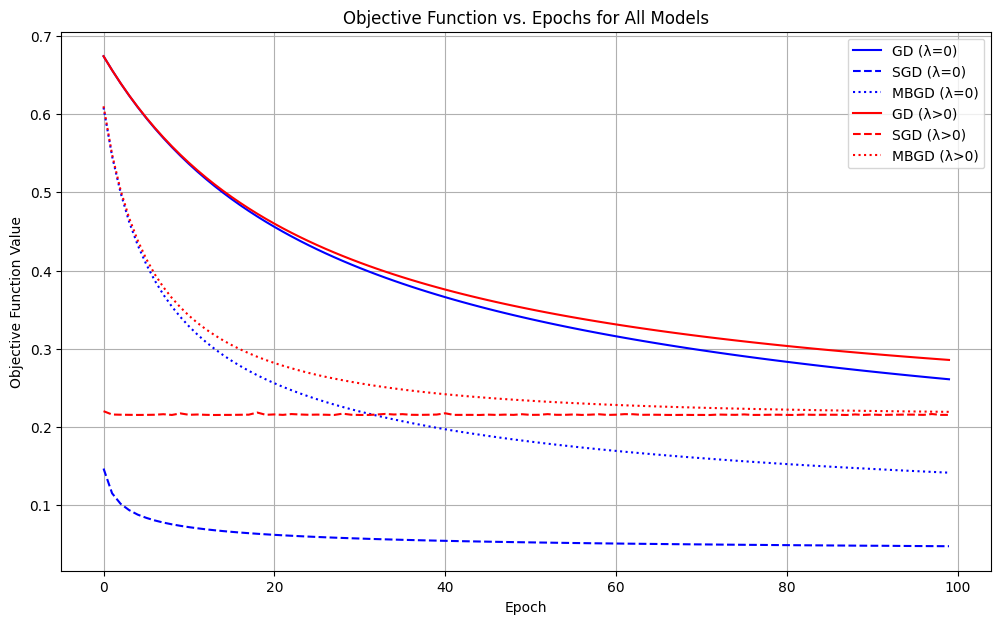

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Example: objvals, objvals_sgd, objvals_mbgd are lists of objective values per epoch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Non-regularized models (λ=0)
plt.plot(objvals, label='GD (λ=0)', color='blue', linestyle='-')
plt.plot(objvals_sgd, label='SGD (λ=0)', color='blue', linestyle='--')
plt.plot(objvals_mbgd, label='MBGD (λ=0)', color='blue', linestyle=':')

# Regularized models (λ>0)
plt.plot(objvals_reg, label='GD (λ>0)', color='red', linestyle='-')
plt.plot(objvals_reg_sgd, label='SGD (λ>0)', color='red', linestyle='--')
plt.plot(objvals_reg_mbgd, label='MBGD (λ>0)', color='red', linestyle=':')

plt.xlabel('Epoch')
plt.ylabel('Objective Function Value')
plt.title('Objective Function vs. Epochs for All Models')
plt.legend()
plt.grid(True)
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [22]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    w = w.reshape(-1)
    logits = X @ w
    probs = 1 / (1 + np.exp(-logits))
    preds = np.where(probs >= 0.5, 1, -1)
    return preds

In [23]:
# evaluate training error of logistric regression and regularized version
# Predict on training and testing sets for unregularized logistic regression
y_pred_train = predict(w_opt, x_train.values)
y_pred_test = predict(w_opt, x_test.values)

# Predict on training and testing sets for regularized logistic regression
y_pred_train_reg = predict(w_opt_reg, x_train.values)
y_pred_test_reg = predict(w_opt_reg, x_test.values)

# Compute accuracy
train_acc = np.mean(y_pred_train == y_train.values)
test_acc = np.mean(y_pred_test == y_test.values)

train_acc_reg = np.mean(y_pred_train_reg == y_train.values)
test_acc_reg = np.mean(y_pred_test_reg == y_test.values)

print(f"Logistic Regression (GD) - Training Accuracy: {train_acc:.4f}")
print(f"Logistic Regression (GD) - Testing Accuracy: {test_acc:.4f}")
print(f"Regularized Logistic Regression (GD) - Training Accuracy: {train_acc_reg:.4f}")
print(f"Regularized Logistic Regression (GD) - Testing Accuracy: {test_acc_reg:.4f}")

Logistic Regression (GD) - Training Accuracy: 0.9473
Logistic Regression (GD) - Testing Accuracy: 0.9737
Regularized Logistic Regression (GD) - Training Accuracy: 0.9451
Regularized Logistic Regression (GD) - Testing Accuracy: 0.9737


In [24]:
# evaluate testing error of logistric regression and regularized version
# Predict on training and testing sets for unregularized logistic regression (SGD)
y_pred_train_sgd = predict(w_opt_sgd, x_train.values)
y_pred_test_sgd = predict(w_opt_sgd, x_test.values)

# Predict on training and testing sets for regularized logistic regression (SGD)
y_pred_train_reg_sgd = predict(w_opt_reg_sgd, x_train.values)
y_pred_test_reg_sgd = predict(w_opt_reg_sgd, x_test.values)

# Compute accuracy
train_acc_sgd = np.mean(y_pred_train_sgd == y_train.values)
test_acc_sgd = np.mean(y_pred_test_sgd == y_test.values)

train_acc_reg_sgd = np.mean(y_pred_train_reg_sgd == y_train.values)
test_acc_reg_sgd = np.mean(y_pred_test_reg_sgd == y_test.values)

print(f"Logistic Regression (SGD) - Training Accuracy: {train_acc_sgd:.4f}")
print(f"Logistic Regression (SGD) - Testing Accuracy: {test_acc_sgd:.4f}")
print(f"Regularized Logistic Regression (SGD) - Training Accuracy: {train_acc_reg_sgd:.4f}")
print(f"Regularized Logistic Regression (SGD) - Testing Accuracy: {test_acc_reg_sgd:.4f}")

Logistic Regression (SGD) - Training Accuracy: 0.9868
Logistic Regression (SGD) - Testing Accuracy: 0.9825
Regularized Logistic Regression (SGD) - Training Accuracy: 0.9736
Regularized Logistic Regression (SGD) - Testing Accuracy: 0.9737


In [25]:
# Predict on training and testing sets for unregularized logistic regression (MBGD)
y_pred_train_mbgd = predict(w_opt_mbgd, x_train.values)
y_pred_test_mbgd = predict(w_opt_mbgd, x_test.values)

# Predict on training and testing sets for regularized logistic regression (MBGD)
y_pred_train_reg_mbgd = predict(w_opt_reg_mbgd, x_train.values)
y_pred_test_reg_mbgd = predict(w_opt_reg_mbgd, x_test.values)

# Compute accuracy
train_acc_mbgd = np.mean(y_pred_train_mbgd == y_train.values)
test_acc_mbgd = np.mean(y_pred_test_mbgd == y_test.values)

train_acc_reg_mbgd = np.mean(y_pred_train_reg_mbgd == y_train.values)
test_acc_reg_mbgd = np.mean(y_pred_test_reg_mbgd == y_test.values)

print(f"Logistic Regression (MBGD) - Training Accuracy: {train_acc_mbgd:.4f}")
print(f"Logistic Regression (MBGD) - Testing Accuracy: {test_acc_mbgd:.4f}")
print(f"Regularized Logistic Regression (MBGD) - Training Accuracy: {train_acc_reg_mbgd:.4f}")
print(f"Regularized Logistic Regression (MBGD) - Testing Accuracy: {test_acc_reg_mbgd:.4f}")

Logistic Regression (MBGD) - Training Accuracy: 0.9670
Logistic Regression (MBGD) - Testing Accuracy: 0.9737
Regularized Logistic Regression (MBGD) - Training Accuracy: 0.9670
Regularized Logistic Regression (MBGD) - Testing Accuracy: 0.9737


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model.

In [26]:
learning_rates = [0.1, 0.01, 0.001]
lambdas = [0.0, 0.01, 0.1, 1.0]  # 0.0 for non-regularized, >0 for regularized
batch_sizes = [16, 32, 64]        # for MBGD

results = []

for lam in lambdas:
    for lr in learning_rates:
        # --------- Gradient Descent (GD) ---------
        w_init = np.zeros(x_train.shape[1])
        w_opt_gd, objvals_gd = gradient_descent(x_train.values, y_train.values, lam, lr, w_init, max_epoch=100)
        y_pred_gd = predict(w_opt_gd, x_test.values)
        acc_gd = np.mean(y_pred_gd == y_test.values)
        results.append({'method': 'GD', 'lam': lam, 'lr': lr, 'batch_size': None, 'accuracy': acc_gd})
        print(f"GD: λ={lam}, lr={lr} => Test Accuracy: {acc_gd:.4f}")

        # --------- Stochastic Gradient Descent (SGD) ---------
        w_init = np.zeros(x_train.shape[1])
        w_opt_sgd, objvals_sgd = sgd(x_train.values, y_train.values, lam, lr, w_init, max_epoch=100)
        y_pred_sgd = predict(w_opt_sgd, x_test.values)
        acc_sgd = np.mean(y_pred_sgd == y_test.values)
        results.append({'method': 'SGD', 'lam': lam, 'lr': lr, 'batch_size': 1, 'accuracy': acc_sgd})
        print(f"SGD: λ={lam}, lr={lr} => Test Accuracy: {acc_sgd:.4f}")

        # --------- Mini-Batch Gradient Descent (MBGD) ---------
        for batch_size in batch_sizes:
            w_init = np.zeros(x_train.shape[1])
            w_opt_mbgd, objvals_mbgd = mbgd(x_train.values, y_train.values, lam, lr, w_init, batch_size=batch_size, max_epoch=100)
            y_pred_mbgd = predict(w_opt_mbgd, x_test.values)
            acc_mbgd = np.mean(y_pred_mbgd == y_test.values)
            results.append({'method': 'MBGD', 'lam': lam, 'lr': lr, 'batch_size': batch_size, 'accuracy': acc_mbgd})
            print(f"MBGD: λ={lam}, lr={lr}, batch_size={batch_size} => Test Accuracy: {acc_mbgd:.4f}")


df_results = pd.DataFrame(results)
max = max(df_results)
#print(df_results.sort_values('accuracy', ascending=False))


GD: λ=0.0, lr=0.1 => Test Accuracy: 0.9649
SGD: λ=0.0, lr=0.1 => Test Accuracy: 0.9737
MBGD: λ=0.0, lr=0.1, batch_size=16 => Test Accuracy: 0.9825
MBGD: λ=0.0, lr=0.1, batch_size=32 => Test Accuracy: 0.9825
MBGD: λ=0.0, lr=0.1, batch_size=64 => Test Accuracy: 0.9825
GD: λ=0.0, lr=0.01 => Test Accuracy: 0.9737
SGD: λ=0.0, lr=0.01 => Test Accuracy: 0.9825
MBGD: λ=0.0, lr=0.01, batch_size=16 => Test Accuracy: 0.9737
MBGD: λ=0.0, lr=0.01, batch_size=32 => Test Accuracy: 0.9649
MBGD: λ=0.0, lr=0.01, batch_size=64 => Test Accuracy: 0.9649
GD: λ=0.0, lr=0.001 => Test Accuracy: 0.9649
SGD: λ=0.0, lr=0.001 => Test Accuracy: 0.9825
MBGD: λ=0.0, lr=0.001, batch_size=16 => Test Accuracy: 0.9737
MBGD: λ=0.0, lr=0.001, batch_size=32 => Test Accuracy: 0.9737
MBGD: λ=0.0, lr=0.001, batch_size=64 => Test Accuracy: 0.9737
GD: λ=0.01, lr=0.1 => Test Accuracy: 0.9649
SGD: λ=0.01, lr=0.1 => Test Accuracy: 0.9737
MBGD: λ=0.01, lr=0.1, batch_size=16 => Test Accuracy: 0.9825
MBGD: λ=0.01, lr=0.1, batch_size=3